<a href="https://colab.research.google.com/github/deelilah/Social-Media-Analysis/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Analysis

## Loading libraries

In [ ]:
# importing pandas 
import pandas as pd
# importing numpy 
import numpy as np
# importing matplotlib
import matplotlib.pyplot as plt 
# import seaborn 
import seaborn as sns

# import scipy 
import scipy.stats

# import re
import re

# import textblob
from textblob import TextBlob
# import WordCloud
from wordcloud import WordCloud

## Loading the data

In [ ]:
# load the data
def load_csv(file_path):
    df = pd.read_csv(file_path, index_col=0)
    return df

In [ ]:
# load moringa tweets
tweets = load_csv("moringatweets.csv")
tweets.head()

,tweets,likes,time,retweets
0,Position yourself for the future of work and U...,0,2021-06-03 11:17:54,0
1,#DataScience \n\nCheck out this blog that outl...,0,2021-06-03 11:17:53,0
2,#datascience\nWe can all agree that we are pas...,7,2021-06-03 11:17:52,3
3,Wishing you all a Happy Madaraka day!\n\n#mori...,11,2021-06-01 07:28:14,3
4,What is that one thing/project/app you have al...,7,2021-05-31 09:34:36,2


In [ ]:
# data summary 
def summary(data):
    # shape
    shape = print(f"The shape of the data is {data.shape}")
    print()
    print('====================================')
    print()
    # brief info
    des = print(f'{data.info()}')

    return shape, des

In [ ]:
summary(tweets)

The shape of the data is (900, 4)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweets    900 non-null    object
 1   likes     900 non-null    int64 
 2   time      900 non-null    object
 3   retweets  900 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 35.2+ KB
None


(None, None)

## Data Analysis

### Retweets And Likes

In [ ]:
def retweets_likes(data, columns):
    if columns == "retweets":
        # average number of retweets 
        avg=print(f'The average number of the {columns} is: {np.round(data[columns].mean(),4)}')
    
        print()
    
        # most number of retweets
        most = print(f'Tweets with the highest number of {columns} is: {data[columns].max()}')

    else:

        avg=print(f'The average number of the {columns} is: {np.round(data[columns].mean(),4)}')
    
        print()
    
        # most number of retweets
        most = print(f'Tweets with the highest number of {columns} is: {data[columns].max()}')


    return avg, most

In [ ]:
# mean and most retweets
retweets_likes(tweets, 'retweets')

The average number of the retweets is: 3.2333

Tweets with the highest number of retweets is: 61


(None, None)

In [ ]:
# mean and most likes
retweets_likes(tweets, 'likes')

The average number of the likes is: 8.6111

Tweets with the highest number of likes is: 66


(None, None)

### Time 

In [ ]:
# find the most appropriate time to post 
def time(data, column):
    # split the time column
    data["date"] = pd.to_datetime(data['time']).dt.date
    data['Time'] = pd.to_datetime(data['time']).dt.time

    # drop the column time 
    data.drop("time", axis=1, inplace=True)

    # convert the column to string
    data['Time'] = data['Time'].astype(str)

    # have the time column in 24hour fomart without the : symbol
    data["Time"] = data["Time"].replace(":","", regex=True)

    # remove the seconds
    data['Time'] = data['Time'].map(lambda x: str(x)[:-2])

    # convert Time to int
    data['Time'] = data['Time'].astype(int)

    return

In [ ]:
time(tweets, "time")

In [ ]:
# preview of data
tweets.head()

,tweets,likes,retweets,date,Time
0,Position yourself for the future of work and U...,0,0,2021-06-03,1117
1,#DataScience \n\nCheck out this blog that outl...,0,0,2021-06-03,1117
2,#datascience\nWe can all agree that we are pas...,7,3,2021-06-03,1117
3,Wishing you all a Happy Madaraka day!\n\n#mori...,11,3,2021-06-01,728
4,What is that one thing/project/app you have al...,7,2,2021-05-31,934


In [ ]:
tweets.dtypes

tweets      object
likes        int64
retweets     int64
date        object
Time         int64
dtype: object

In [ ]:
# asin specific time to a time period
def time_period(data, column):
    # create a list of our conditions
    conditions = [
        (data[column] <= 300),
        (data[column] > 300) & (data[column] <= 600),
        (data[column] > 600) & (data[column] <= 800),
        (data[column] > 800) & (data[column] <= 1000),
        (data[column] > 1000) & (data[column] <= 1200),
        (data[column] > 1200) & (data[column] <= 1400),
        (data[column] > 1400) & (data[column] <= 1600),
        (data[column] > 1600) & (data[column] <= 1800),
        (data[column] > 1800) & (data[column] <= 2100),
        (data[column] > 2100) & (data[column] <= 2359)
        ]

    # create a list of the values we want to assign for each condition
    periods = ["Late-Night","Towards-Morning","Early-Morning","Mid-Morning","Late-Morning","Early-Afternoon","Mid-Afternoon","Late-Afternoon","Evening","Late-Evening"]

    # create a new column and use np.select to assign values to it using our lists as arguments
    data['time_Period'] = np.select(conditions, periods)

    # drop the actual time column
    data.drop(column, axis=1, inplace=True)
    
    
    return

In [ ]:
time_period(tweets, "Time")

In [ ]:
tweets.head()

,tweets,likes,retweets,date,time_Period
0,Position yourself for the future of work and U...,0,0,2021-06-03,Late-Morning
1,#DataScience \n\nCheck out this blog that outl...,0,0,2021-06-03,Late-Morning
2,#datascience\nWe can all agree that we are pas...,7,3,2021-06-03,Late-Morning
3,Wishing you all a Happy Madaraka day!\n\n#mori...,11,3,2021-06-01,Early-Morning
4,What is that one thing/project/app you have al...,7,2,2021-05-31,Mid-Morning


In [ ]:
tweets['time_Period'].value_counts()

Mid-Morning        286
Early-Morning      257
Early-Afternoon    123
Late-Morning       115
Mid-Afternoon       51
Late-Afternoon      32
Towards-Morning     31
Evening              2
Late-Evening         2
Late-Night           1
Name: time_Period, dtype: int64

In [ ]:
# time and interactions 
def ret_likes_per_time(data,column,val1,val2):
    # get the count of posts per time period
    time = data.groupby(column)[column].count()
    # total number of retweets per time period
    retweet = data.groupby(column)[val1].sum()
    # total number of likes per time period
    likes = data.groupby(column)[val2].sum()
    # create a new dataframe to store 
    df = pd.DataFrame({"time_period": time.index, "posts":time.values, 'total_retweets': retweet.values, "total_likes":likes.values})
    # calculate the ratio of retweets per post
    df["avg_retweet"] = np.round(df['total_retweets'] / df['posts'],2)
    # calculate the ratio of likes per post
    df["avg_likes"] = np.round(df['total_likes'] / df['posts'],2)

    return df

In [ ]:
df = ret_likes_per_time(tweets, 'time_Period', 'retweets', 'likes')
df

,time_period,posts,total_retweets,total_likes,avg_retweet,avg_likes
0,Early-Afternoon,123,358,1046,2.91,8.50
1,Early-Morning,257,1009,2512,3.93,9.77
2,Evening,2,0,0,0.00,0.00
3,Late-Afternoon,32,66,114,2.06,3.56
4,Late-Evening,2,12,49,6.00,24.50
5,Late-Morning,115,396,879,3.44,7.64
6,Late-Night,1,5,0,5.00,0.00
7,Mid-Afternoon,51,138,337,2.71,6.61
8,Mid-Morning,286,814,2577,2.85,9.01
9,Towards-Morning,31,112,236,3.61,7.61


In [ ]:
# plot of per time
def time_plots(data, varX, varY):
    sns.set_style("whitegrid")

    bar,ax = plt.subplots(figsize=(16,12))

    ax = sns.barplot(x = varX, y =varY , data = data, ci=None, palette="muted",orient='v')
    ax.set_title(f"Number of {varY.replace('_',' ').title()} per specific {varX.replace('_',' ').title()}", fontsize = 22)
    ax.set_xlabel (f"{varX.replace('_',' ').title()}", fontsize = 18)
    ax.set_ylabel (f"{varY.replace('_',' ').title()}", fontsize = 18)
    plt.yticks(fontsize=14)
    bar.savefig(f"{varY.title()}.png")
    return ax

<AxesSubplot:title={'center':'Number of Posts per specific Time Period'}, xlabel='Time Period', ylabel='Posts'>

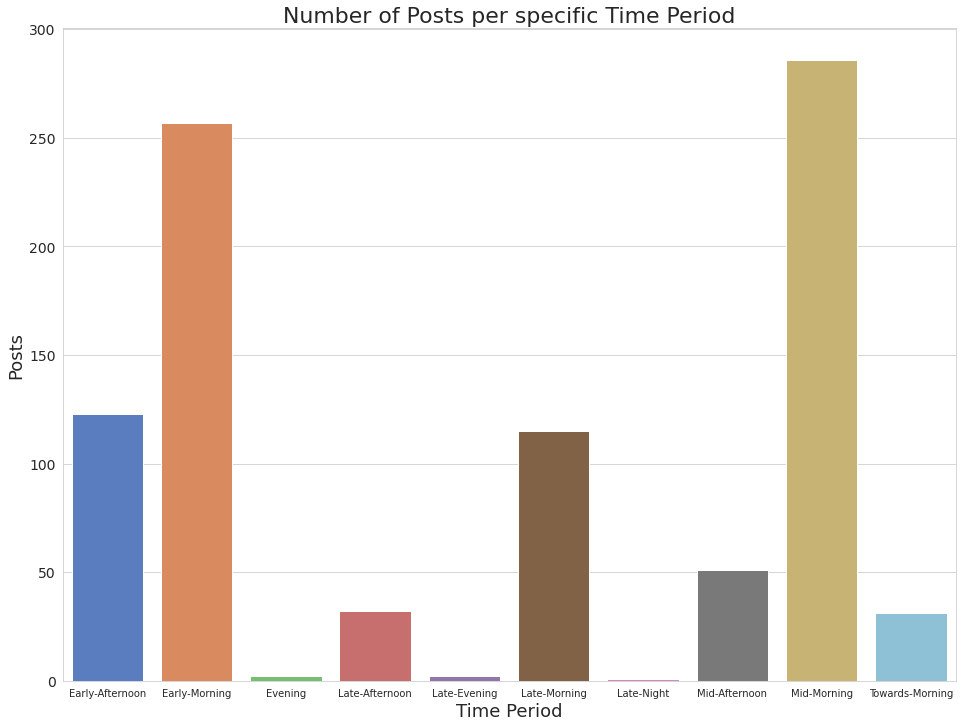

In [ ]:
time_plots(df, "time_period", "posts")

<AxesSubplot:title={'center':'Number of Total Retweets per specific Time Period'}, xlabel='Time Period', ylabel='Total Retweets'>

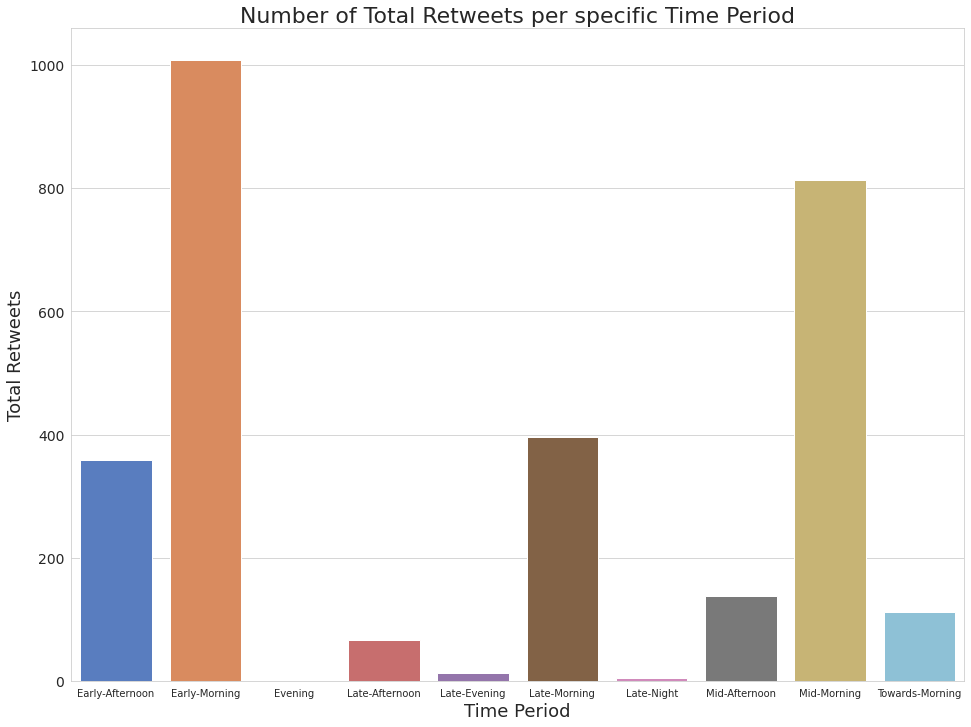

In [ ]:
time_plots(df, "time_period", "total_retweets")

<AxesSubplot:title={'center':'Number of Total Likes per specific Time Period'}, xlabel='Time Period', ylabel='Total Likes'>

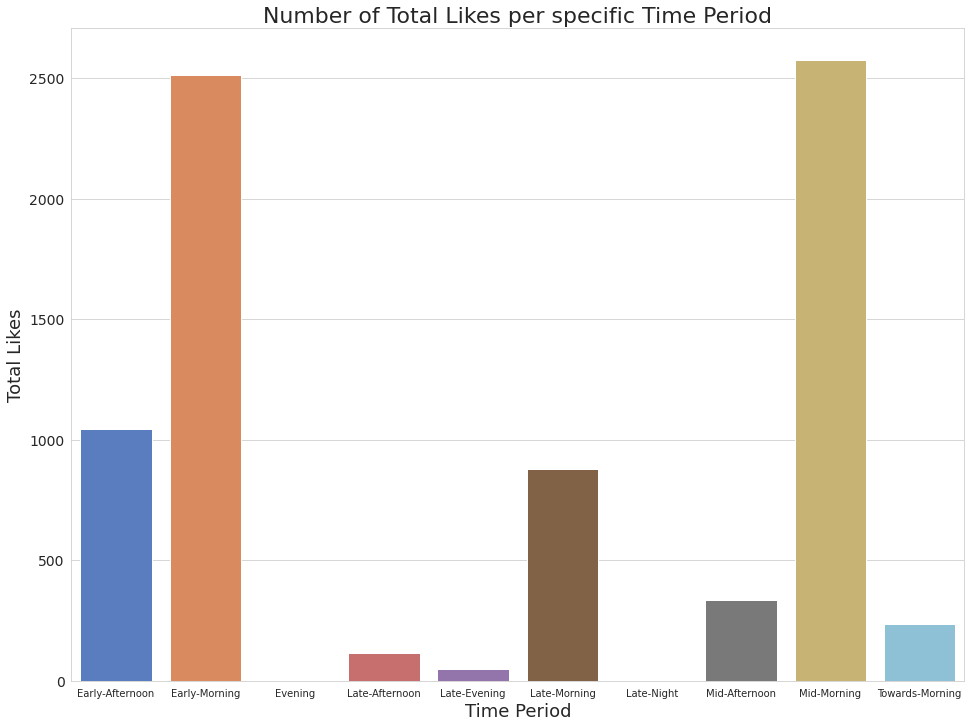

In [ ]:
time_plots(df, "time_period", "total_likes")

<AxesSubplot:title={'center':'Number of Avg Retweet per specific Time Period'}, xlabel='Time Period', ylabel='Avg Retweet'>

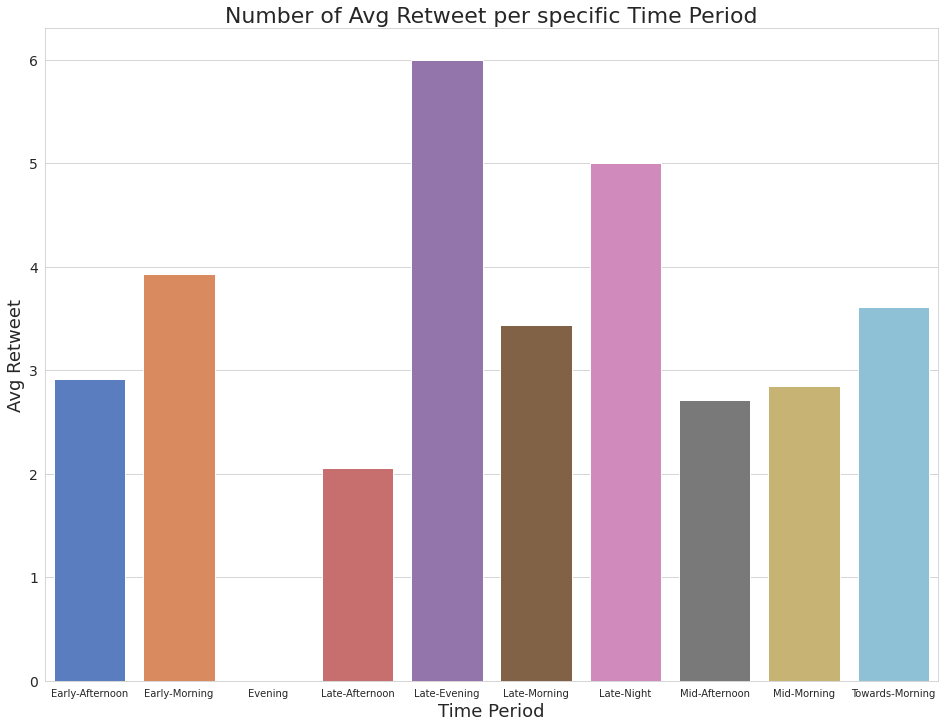

In [ ]:
time_plots(df, "time_period", "avg_retweet")

<AxesSubplot:title={'center':'Number of Avg Likes per specific Time Period'}, xlabel='Time Period', ylabel='Avg Likes'>

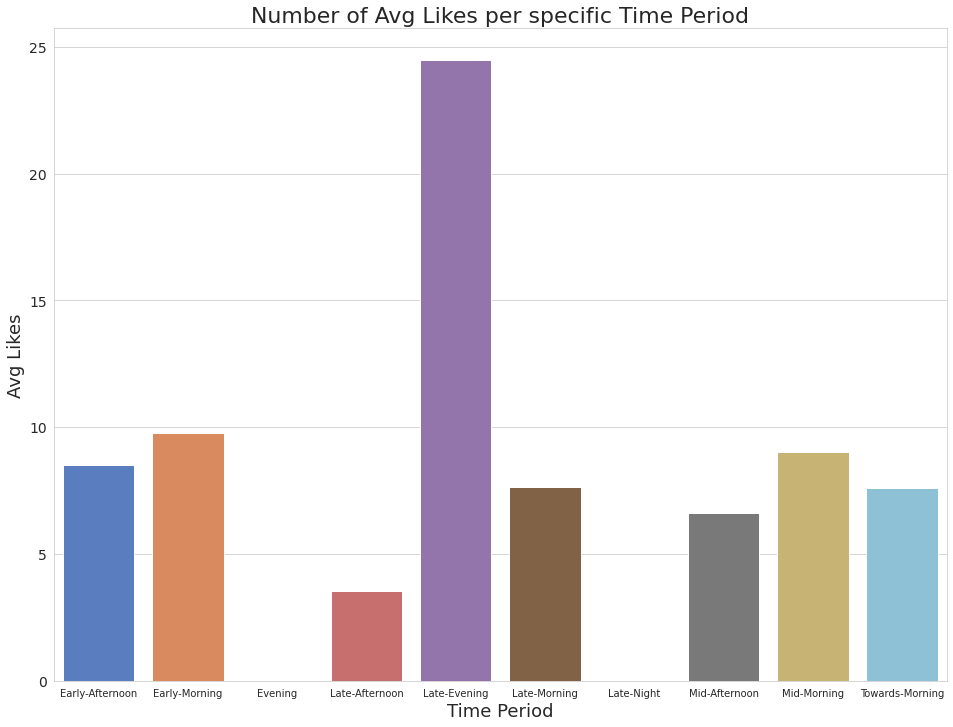

In [ ]:
time_plots(df, "time_period", "avg_likes")

In [ ]:
# correlation 
def correlation(data, var1, var2):
    # the correlation coeffecient
    corr_coef = print(f"The Pearson Correlation Coeffecient of {var1.replace('_', ' ').title()} and {var2.replace('_', ' ').title()} is: {np.round((scipy.stats.pearsonr(data[var1], data[var2])[0]),4)}.")
    # the p-value
    p_value = print(f"The p-value of {var1.replace('_', ' ').title()} and {var2.replace('_', ' ').title()} is: {(scipy.stats.pearsonr(data[var1], data[var2])[1])}.")


    return corr_coef, p_value



In [ ]:
correlation(df, "posts", "total_retweets")

The Pearson Correlation Coeffecient of Posts and Total Retweets is: 0.9792.
The p-value of Posts and Total Retweets is: 7.956158164503429e-07.


(None, None)

In [ ]:
correlation(df, "posts", "total_likes")

The Pearson Correlation Coeffecient of Posts and Total Likes is: 0.9953.
The p-value of Posts and Total Likes is: 2.0411885395734178e-09.


(None, None)

In [ ]:
correlation(df, "posts", "avg_retweet")

The Pearson Correlation Coeffecient of Posts and Avg Retweet is: -0.0092.
The p-value of Posts and Avg Retweet is: 0.9798172604406531.


(None, None)

In [ ]:
correlation(df, "posts", "avg_likes")

The Pearson Correlation Coeffecient of Posts and Avg Likes is: 0.1227.
The p-value of Posts and Avg Likes is: 0.7356111861926343.


(None, None)

### Conclusions from Time
* Most tweets by Moringa School account are at Mid-Morning `8:01am - 10:00am` and Early-Morning `6:01am - 8:00am`.
* Early-Afternoon `12:01pm - 2:00pm` and Late-Morning `10:01am - 12:00am` also have a higher percentage of posts.
* Evening `6:01pm - 9:00pm`, Late-Evening `9:01pm - 11:59pm` and Late-Night `0:00am - 3:00am` have the least number of posts.
* Tweets sent Early-Morning `6:01am - 8:00am` and Mid-Morning `8:01am - 10:00am` have the highest total number of retweets compared to other periods of the day.
* Tweets sent in the Evening `6:01pm - 9:00pm`, Late-Evening `9:01pm - 11:59pm` and Late-Night `0:00am - 3:00am` have the least total number of retweets compared to other periods of the day.
* Tweets sent Mid-Morning `8:01am - 10:00am` and Early-Morning `6:01am - 8:00am` also have the highest total number of likes while tweets sent in the Evening `6:01pm - 9:00pm`, Late-Evening `9:01pm - 11:59pm` and Late-Night `0:00am - 3:00am` have the least number of total likes.
* Tweets sent Early-Morning and Late-Morning have a higher number of retweets and likes compared to other time periods of the day, Early-Afternoon and Late-Morning have average number of likes and retweets while tweets sent Late-Afternoon, Late-Evening, Mid-Afternoon and Towards-Morning have low number of likes and retweets. Late-Night and Evening have the least.
* Comparing the ratio of posts to the number of retweets, Early-Morning and Late-Morning have higher ratios. Its important to note the fact that Late-Evening and Late-Night have higher ratios is due to the fact that they have very low number of post. 

### Tweets

* The current content categories are: Quotes, Weekly updates, Moringa school USP, SD product, Software engineering content, Blog & resources feature, Events, Testimonials, DS product, Data science content, Events, Evergreen Tech content, Promos, QnA games, employability, career readiness,transformation, financial aid, accessibility & inclusivity.
* To do analysis, the tweets are to be classified into this categories and each category analysed individually. This entails a list of words that would relate to each category.
* Analysis to do:
    >> Category with the most interactions.

    >> Best time to post each category.

    >> How to improve the interactions on various categories.

In [ ]:
# data head
tweets.head()

,tweets,likes,retweets,date,time_Period
0,Position yourself for the future of work and U...,0,0,2021-06-03,Late-Morning
1,#DataScience \n\nCheck out this blog that outl...,0,0,2021-06-03,Late-Morning
2,#datascience\nWe can all agree that we are pas...,7,3,2021-06-03,Late-Morning
3,Wishing you all a Happy Madaraka day!\n\n#mori...,11,3,2021-06-01,Early-Morning
4,What is that one thing/project/app you have al...,7,2,2021-05-31,Mid-Morning


In [ ]:
# replace the characters
def characters(data,var):
  data[var]  = data[var].str.replace('#','', regex=True).str.replace('\n', '', regex=True)

  return 


characters(tweets, 'tweets')

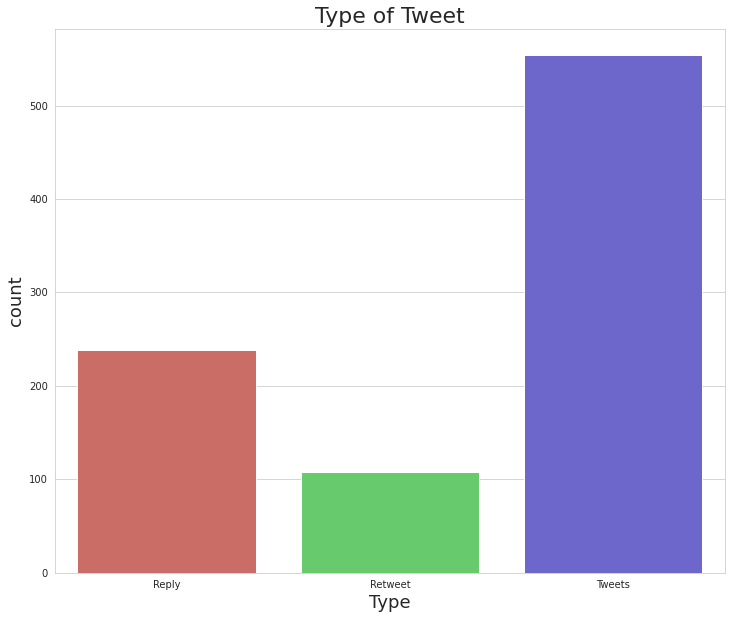

Tweets     554
Reply      238
Retweet    108
Name: type, dtype: int64

In [ ]:
# split the tweets between retweets, tweeets and reply
def split_tweets(data, var):
    # create a list of conditions 
    conditions = [
        (data[var].str.contains('RT')),
        (data[var].str.contains('@'))
        ]

    # values to asign to this conditions
    values = ["Retweet", "Reply"]

    # create column
    data['type'] = np.select(conditions, values)

    # replace the rest with tweets 
    data['type'] = data['type'].str.replace('0', 'Tweets', regex=True)

    # the value counts
    out = data['type'].value_counts()

    # display results 
    type_df = data.groupby('type')['type'].count()
    
    # set the axis 
    sns.set_style("whitegrid")

    bar, ax = plt.subplots(figsize = (12,10))

    ax = sns.barplot(x = type_df.keys(), y = type_df.values , data = data, palette='hls')

    ax.set_xlabel("Type", fontsize = 18)
    ax.set_ylabel("count", fontsize = 18)
    ax.set_title("Type of Tweet", fontsize = 22)

    # save
    bar.savefig('type.png')

    plt.show()


    return out


split_tweets(tweets, 'tweets')

In [ ]:
# create three dataframes one for each type of tweet
def tweet_type(data,var,value):
    # selecting rows based on condition
    rslt_df = data.loc[data[var] == value]

    return rslt_df

In [ ]:
# tweets data
new_tweets = tweet_type(tweets, 'type', 'Tweets')
new_tweets.head()

,tweets,likes,retweets,date,time_Period,type
0,Position yourself for the future of work and U...,0,0,2021-06-03,Late-Morning,Tweets
1,DataScience Check out this blog that outlines ...,0,0,2021-06-03,Late-Morning,Tweets
2,datascienceWe can all agree that we are past t...,7,3,2021-06-03,Late-Morning,Tweets
3,Wishing you all a Happy Madaraka day!moringasc...,11,3,2021-06-01,Early-Morning,Tweets
4,What is that one thing/project/app you have al...,7,2,2021-05-31,Mid-Morning,Tweets


In [ ]:
# reply data
reply_df = tweet_type(tweets, 'type', 'Reply')
reply_df.head()

,tweets,likes,retweets,date,time_Period,type
16,@NdemoKelvin Thank you for being such an aweso...,3,0,2021-05-13,Late-Morning,Reply
22,"@DynastyElvis Hi Elvis, we are currently offer...",0,0,2021-05-06,Mid-Morning,Reply
30,"@itsatatiiii Hi, DM us for Financial Aid details.",0,0,2021-05-04,Mid-Afternoon,Reply
31,@Thesubanese Please email your inquiry to admi...,0,0,2021-05-03,Mid-Morning,Reply
32,Happy new month!Invest in an industry specific...,14,7,2021-05-03,Early-Morning,Reply


In [ ]:
# retweets data 
retweet_df = tweet_type(tweets, 'type', 'Retweet')
retweet_df.head()

,tweets,likes,retweets,date,time_Period,type
6,RT @audreypcheng: So crazy that today marks 7 ...,0,16,2021-05-28,Early-Morning,Retweet
17,RT @mistrmuli_: Joining @moringaschool,0,1,2021-05-12,Towards-Morning,Retweet
18,RT @TobiLafinhan: Absolutely enjoyed this chat...,0,6,2021-05-11,Early-Afternoon,Retweet
19,How is your week going?Have you had a chance t...,12,1,2021-05-11,Early-Morning,Retweet
46,RT @ChrisBarso: It was an absolute pleasure in...,0,3,2021-04-19,Towards-Morning,Retweet


In [ ]:
# clean the text 
def clean_text(text):
    # remove the @mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # remove the '#' symbol
    text = re.sub(r'#', '', text)
    # remove the ':' symbol
    text = re.sub(r':', '', text)
    # remove the RT 
    text = re.sub(r'RT[\s]+','', text)
    # remove hyper links 
    text = re.sub(r'https?:\/\/\S+', '', text)

    return text

# apply the function to the DataFrame containing the tweets 
new_tweets['tweets'] = new_tweets['tweets'].apply(clean_text)

# display the data
new_tweets.head()

<ipython-input-40-ba5e506a5ebe>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tweets['tweets'] = new_tweets['tweets'].apply(clean_text)


,tweets,likes,retweets,date,time_Period,type
0,Position yourself for the future of work and U...,0,0,2021-06-03,Late-Morning,Tweets
1,DataScience Check out this blog that outlines ...,0,0,2021-06-03,Late-Morning,Tweets
2,datascienceWe can all agree that we are past t...,7,3,2021-06-03,Late-Morning,Tweets
3,Wishing you all a Happy Madaraka day!moringasc...,11,3,2021-06-01,Early-Morning,Tweets
4,What is that one thing/project/app you have al...,7,2,2021-05-31,Mid-Morning,Tweets


In [ ]:
# apply to the dataframe containing the retweets
retweet_df["tweets"] = retweet_df["tweets"].apply(clean_text)

# view the head
retweet_df.head()

<ipython-input-41-39852c79eb00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweet_df["tweets"] = retweet_df["tweets"].apply(clean_text)


,tweets,likes,retweets,date,time_Period,type
6,So crazy that today marks 7 years exactly sinc...,0,16,2021-05-28,Early-Morning,Retweet
17,_ Joining,0,1,2021-05-12,Towards-Morning,Retweet
18,Absolutely enjoyed this chat with David (_afri...,0,6,2021-05-11,Early-Afternoon,Retweet
19,How is your week going?Have you had a chance t...,12,1,2021-05-11,Early-Morning,Retweet
46,It was an absolute pleasure interacting with t...,0,3,2021-04-19,Towards-Morning,Retweet


In [ ]:
# apply to the dataframe containing the replys
reply_df["tweets"] = reply_df["tweets"].apply(clean_text)

reply_df.head()

<ipython-input-42-8b92aa611998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reply_df["tweets"] = reply_df["tweets"].apply(clean_text)


,tweets,likes,retweets,date,time_Period,type
16,Thank you for being such an awesome team play...,3,0,2021-05-13,Late-Morning,Reply
22,"Hi Elvis, we are currently offering partial s...",0,0,2021-05-06,Mid-Morning,Reply
30,"Hi, DM us for Financial Aid details.",0,0,2021-05-04,Mid-Afternoon,Reply
31,Please email your inquiry to admissions.acces...,0,0,2021-05-03,Mid-Morning,Reply
32,Happy new month!Invest in an industry specific...,14,7,2021-05-03,Early-Morning,Reply


In [ ]:
# reset the indexes
new_tweets.reset_index(drop=True, inplace=True)
reply_df.reset_index(drop=True, inplace=True)
retweet_df.reset_index(drop=True, inplace=True)

In [ ]:
# save the dataframes into csv
new_tweets.to_csv("tweets.csv")
reply_df.to_csv("reply.csv")
retweet_df.to_csv("retweet.csv")


In [ ]:
# loading data with content_theme
tweets_frame = pd.read_csv("tweets.csv", index_col=0)
tweets_frame.head(10)

,tweets,likes,retweets,date,time_Period,type,content theme
0,Position yourself for the future of work and U...,0,0,2021-06-03,Late-Morning,Tweets,Lead Generation
1,DataScience Check out this blog that outlines ...,0,0,2021-06-03,Late-Morning,Tweets,Engagement
2,datascienceWe can all agree that we are past t...,7,3,2021-06-03,Late-Morning,Tweets,Lead Generation
3,Wishing you all a Happy Madaraka day!moringasc...,11,3,2021-06-01,Early-Morning,Tweets,Engagement
4,What is that one thing/project/app you have al...,7,2,2021-05-31,Mid-Morning,Tweets,Engagement
5,Looking forward to the DatafestAfrica virtual ...,14,12,2021-05-28,Early-Morning,Tweets,Engagement
6,You can now learn while you still focus on you...,16,21,2021-05-27,Early-Afternoon,Tweets,Lead Generation
7,Anything is possible if you put your mind to i...,17,2,2021-05-26,Early-Afternoon,Tweets,Brand Awareness
8,Orientation week in progress....Our new studen...,24,5,2021-05-25,Early-Morning,Tweets,Lead Generation
9,You asked and we heard you!Moringa School will...,25,21,2021-05-24,Late-Morning,Tweets,Lead Generation


In [ ]:
# interactions by content theme
def content_theme(data, column):
  cont = data.groupby(column)[column].count()
  # set the axis 
  sns.set_style("whitegrid")

  bar, ax = plt.subplots(figsize = (12,10))

  ax = sns.barplot(x = cont.keys(), y = cont.values , data = data, palette='hls')

  ax.set_xlabel(f"{column.title()}", fontsize = 18)
  ax.set_ylabel("count", fontsize = 18)
  ax.set_title(f"Type of {column.title()}", fontsize = 22)

  # save
  bar.savefig('content_theme.png')

  plt.show()
  return cont

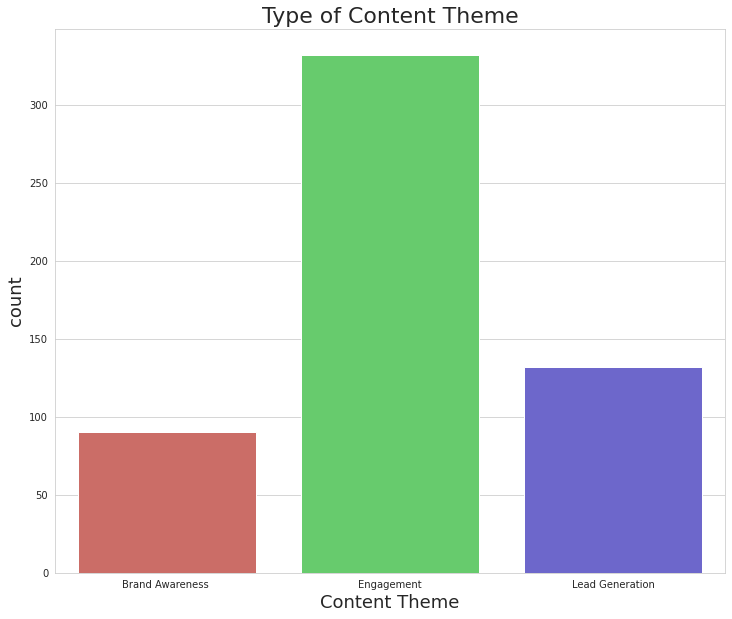

content theme
Brand Awareness      90
Engagement          332
Lead Generation     132
Name: content theme, dtype: int64

In [ ]:
content_theme(tweets_frame, "content theme")

In [ ]:
# interactions by content theme
def content_theme_time(data, column, var, theme):
  time = data.groupby([column,var])[var].count()
  new = pd.DataFrame(time)
  # rename the column time_period 
  df = new.rename_axis([f'{column.title()}', 'Time Period']).reset_index()
  
  df.rename(columns={"time_Period":"count"}, inplace=True)
  # brand awareness 
  data = df[df["Content Theme"] == theme]

  # set the axis 
  sns.set_style("whitegrid")

  bar, ax = plt.subplots(figsize = (12,10))

  ax = sns.barplot(x = "Time Period", y = "count", data = data, palette='hls')

  ax.set_xlabel("Time Period", fontsize = 18)
  ax.set_ylabel("count", fontsize = 18)
  ax.set_title(f"Distribution of {theme} Tweets", fontsize = 22)

  # save
  bar.savefig(f'{theme.replace(" ","")}.png')

  plt.show()

  return data

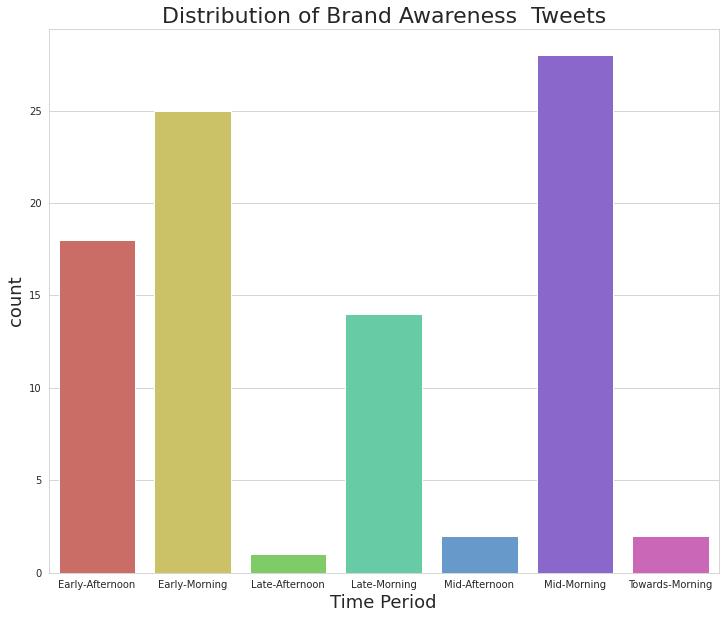

,Content Theme,Time Period,count
0,Brand Awareness,Early-Afternoon,18
1,Brand Awareness,Early-Morning,25
2,Brand Awareness,Late-Afternoon,1
3,Brand Awareness,Late-Morning,14
4,Brand Awareness,Mid-Afternoon,2
5,Brand Awareness,Mid-Morning,28
6,Brand Awareness,Towards-Morning,2


In [ ]:
content_theme_time(tweets_frame, "content theme", "time_Period", 'Brand Awareness ')

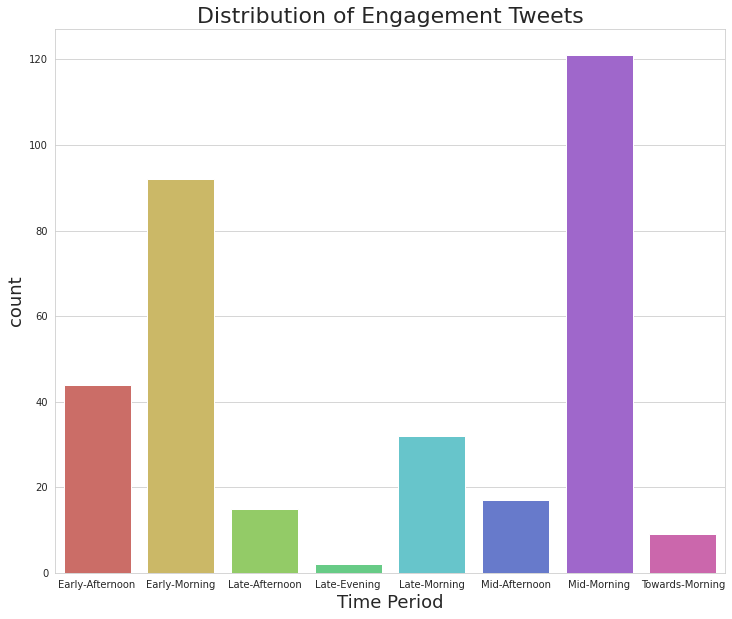

,Content Theme,Time Period,count
7,Engagement,Early-Afternoon,44
8,Engagement,Early-Morning,92
9,Engagement,Late-Afternoon,15
10,Engagement,Late-Evening,2
11,Engagement,Late-Morning,32
12,Engagement,Mid-Afternoon,17
13,Engagement,Mid-Morning,121
14,Engagement,Towards-Morning,9


In [ ]:
content_theme_time(tweets_frame, "content theme", "time_Period", 'Engagement')

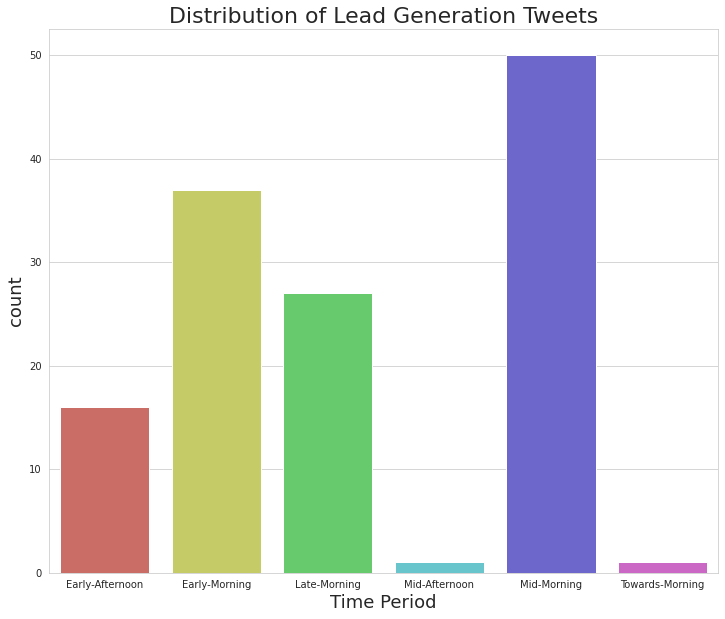

,Content Theme,Time Period,count
15,Lead Generation,Early-Afternoon,16
16,Lead Generation,Early-Morning,37
17,Lead Generation,Late-Morning,27
18,Lead Generation,Mid-Afternoon,1
19,Lead Generation,Mid-Morning,50
20,Lead Generation,Towards-Morning,1


In [ ]:
content_theme_time(tweets_frame, "content theme", "time_Period", 'Lead Generation')

In [ ]:
# likes as per the content type
def like_content(data, column, var1, var2):
    # sum of like per content theme
    likes = data.groupby(column)[var1].sum()
    # sum of retweets per content theme 
    retweets = data.groupby(column)[var2].sum()

    # convert the results into a dataframe
    df_likes = pd.DataFrame(likes).reset_index()
    df_retweets = pd.DataFrame(retweets).reset_index() 

    # count of content theme
    actual = data.groupby(column)[column].count()
    df_actual = pd.DataFrame(actual).rename_axis(['content theme']).rename(columns={"content theme":"count"}).reset_index()    
    
    # merge the three dataframes 
    data = df_actual.merge(df_likes, on="content theme").merge(df_retweets, on="content theme")

    # calculate the average likes per content theme
    data["avg_likes"] = data["likes"]/data["count"]

    # calculate the average retweets per content theme
    data["avg_retweets"] = data["retweets"]/data["count"]
    
    final = data.round({'avg_likes': 3, 'avg_retweets': 3})
    return final

In [ ]:
like_content(tweets_frame, "content theme", "likes", "retweets")

,content theme,count,likes,retweets,avg_likes,avg_retweets
0,Brand Awareness,90,1454,331,16.156,3.678
1,Engagement,332,3562,1094,10.729,3.295
2,Lead Generation,132,1653,628,12.523,4.758


In [ ]:
def plot_interactions(value):
    data = like_content(tweets_frame, "content theme", "likes", "retweets")

    # set the axis 
    sns.set_style("whitegrid")

    bar, ax = plt.subplots(figsize = (12,10))

    value = value.title()
    if value == "Likes":
      ax = sns.barplot(x = "content theme", y = "avg_likes", data = data, palette='hls')
    elif value == "Retweets":
      ax = sns.barplot(x = "content theme", y = "avg_retweets", data = data, palette='hls')
    else:
      print("Enter Correct value")

    ax.set_xlabel("Content Theme", fontsize = 18)
    ax.set_ylabel(f"Average {value.title()}", fontsize = 18)
    ax.set_title(f"Average {value} per Content Theme", fontsize = 22)

  # save
    bar.savefig(f'{value}.png')

    plt.show()

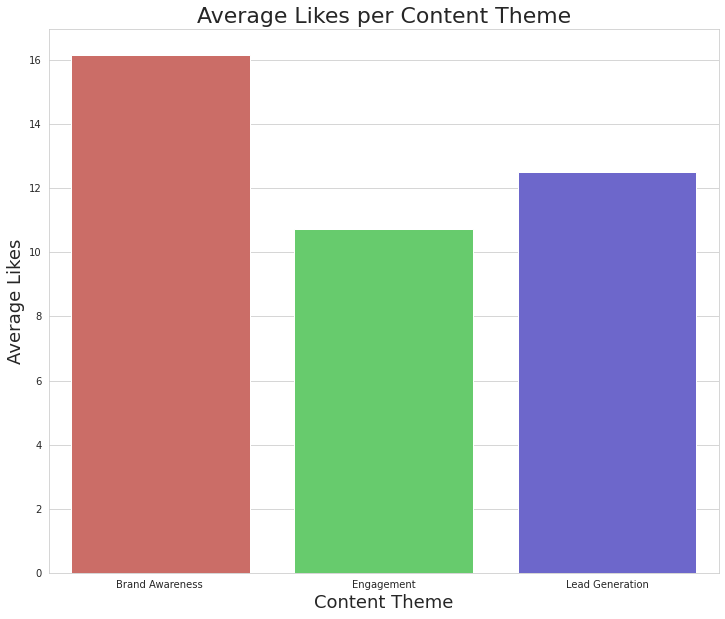

In [ ]:
plot_interactions("likes")

Enter Correct value


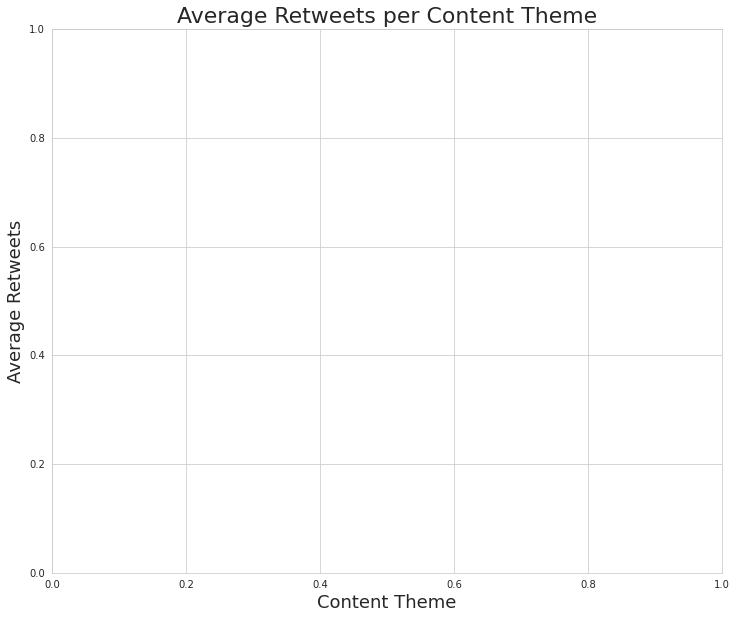

In [ ]:
plot_interactions("retweets")

In [ ]:
def word_count(data, out):
    # word Count 
    from wordcloud import WordCloud, STOPWORDS
    comment_words = ''
    stopwords = set(STOPWORDS)
 
    # iterate through the csv file
    for val in data['tweets']:
     
        # typecaste each val to string
        val = str(val)
 
        # split the value
        tokens = val.split()
     
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
     
        comment_words += " ".join(tokens)+" "
 
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
 
    # plot the WordCloud image                      
    bar = plt.figure(figsize = (12, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    bar.savefig(f"{out}.png")
    plt.tight_layout(pad = 0)
 
    plt.show()

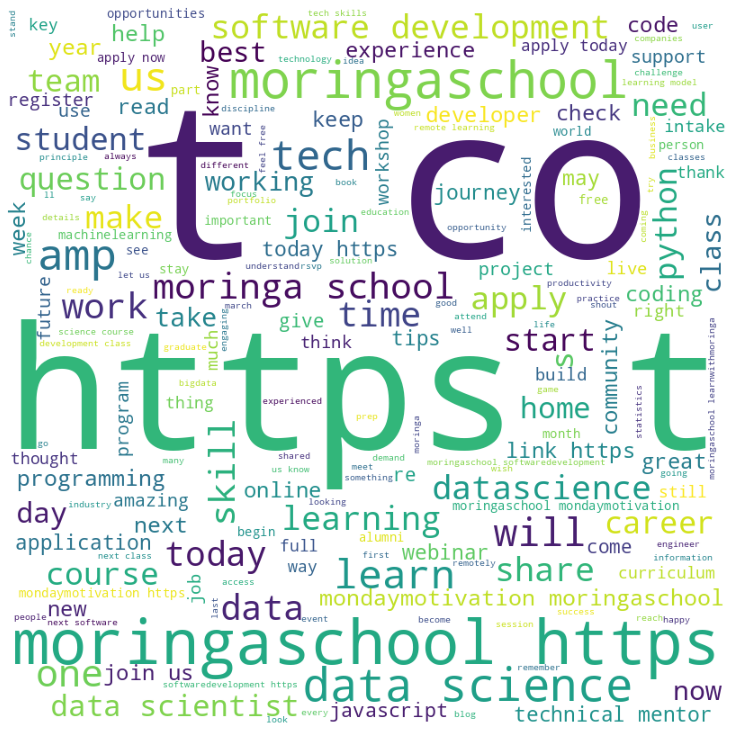

In [ ]:
word_count(tweets_frame, "tweets_wordcount")

In [ ]:
# loading the data with content theme
reply_frame = pd.read_csv("reply.csv", index_col=0)
reply_frame.head(10)

,tweets,likes,retweets,date,time_Period,type,content theme
0,Thank you for being such an awesome team play...,3,0,2021-05-13,Late-Morning,Reply,Brand Awareness
1,"Hi Elvis, we are currently offering partial s...",0,0,2021-05-06,Mid-Morning,Reply,Lead Generation
2,"Hi, DM us for Financial Aid details.",0,0,2021-05-04,Mid-Afternoon,Reply,Lead Generation
3,Please email your inquiry to admissions.acces...,0,0,2021-05-03,Mid-Morning,Reply,Lead Generation
4,Happy new month!Invest in an industry specific...,14,7,2021-05-03,Early-Morning,Reply,Lead Generation
5,Good job Allan!,1,0,2021-04-26,Early-Morning,Reply,Engagement
6,Happy to have you back &amp; speak to the stu...,1,0,2021-04-22,Mid-Morning,Reply,Engagement
7,"""My journey has not been easy.. I did my KCSE ...",26,5,2021-04-21,Mid-Morning,Reply,Brand Awareness
8,Yes you can apply to join. Visit our website ...,1,0,2021-04-19,Towards-Morning,Reply,Lead Generation
9,Super excited about this feature &amp; recogni...,10,6,2021-04-15,Mid-Morning,Reply,Engagement


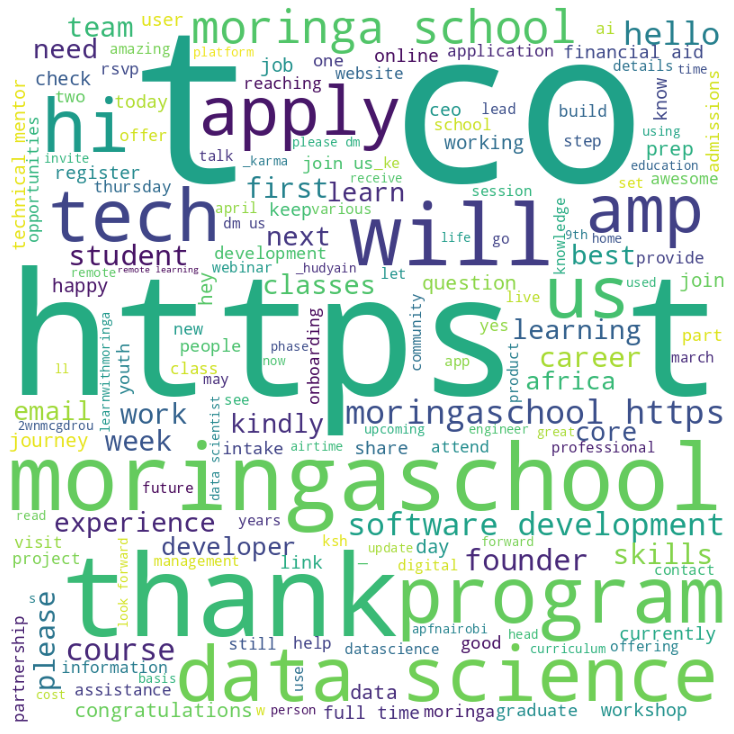

In [ ]:
word_count(reply_frame, "reply_wordcount")

In [ ]:
# loading the data with content theme
retweet_frame = pd.read_csv("retweet.csv", index_col=0)
retweet_frame.head(10)

,tweets,likes,retweets,date,time_Period,type,content theme
0,So crazy that today marks 7 years exactly sinc...,0,16,2021-05-28,Early-Morning,Retweet,Brand Awareness
1,_ Joining,0,1,2021-05-12,Towards-Morning,Retweet,Engagement
2,Absolutely enjoyed this chat with David (_afri...,0,6,2021-05-11,Early-Afternoon,Retweet,Engagement
3,How is your week going?Have you had a chance t...,12,1,2021-05-11,Early-Morning,Retweet,Lead Generation
4,It was an absolute pleasure interacting with t...,0,3,2021-04-19,Towards-Morning,Retweet,Engagement
5,Woow I thank God🙏 for the good health his give...,0,4,2021-04-16,Mid-Afternoon,Retweet,Brand Awareness
6,in Partnership with has organized a webinar f...,0,18,2021-04-15,Early-Morning,Retweet,Engagement
7,So stoked to be a part of this current cohort ...,0,10,2021-03-23,Early-Afternoon,Retweet,Brand Awareness
8,_komar Finally got Certified!!!😎😎Hey KOT help...,0,21,2021-03-22,Towards-Morning,Retweet,Engagement
9,_Karma A web app that helps farmers detect dis...,0,2,2021-03-16,Towards-Morning,Retweet,Brand Awareness


In [ ]:
# Merging the data together
def merge_data(df1,df2,df3):
    data = df1.append([df2,df3])
    return data.head()

In [ ]:
# merged data 
merge_data(tweets_frame, reply_frame, retweet_frame)

,tweets,likes,retweets,date,time_Period,type,content theme
0,Position yourself for the future of work and U...,0,0,2021-06-03,Late-Morning,Tweets,Lead Generation
1,DataScience Check out this blog that outlines ...,0,0,2021-06-03,Late-Morning,Tweets,Engagement
2,datascienceWe can all agree that we are past t...,7,3,2021-06-03,Late-Morning,Tweets,Lead Generation
3,Wishing you all a Happy Madaraka day!moringasc...,11,3,2021-06-01,Early-Morning,Tweets,Engagement
4,What is that one thing/project/app you have al...,7,2,2021-05-31,Mid-Morning,Tweets,Engagement


In [ ]:
# Function to obtain subjectivity 
def getSubjectivity(text):
    sub = TextBlob(text).sentiment.subjectivity
    
    return sub

# function to get polarity
def getPolarity(text):
    pol = TextBlob(text).sentiment.polarity

    return pol

# add to the dataframe
new_tweets['Subjectivity'] = new_tweets['tweets'].apply(getSubjectivity)
new_tweets['Polarity'] = new_tweets['tweets'].apply(getPolarity)

# view the dataframe
new_tweets.head()


<ipython-input-60-255a63adad99>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tweets['Subjectivity'] = new_tweets['tweets'].apply(getSubjectivity)
<ipython-input-60-255a63adad99>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tweets['Polarity'] = new_tweets['tweets'].apply(getPolarity)


,tweets,likes,retweets,date,time_Period,type,Subjectivity,Polarity
0,Position yourself for the future of work and U...,0,0,2021-06-03,Late-Morning,Tweets,0.125,0.000
1,DataScience Check out this blog that outlines ...,0,0,2021-06-03,Late-Morning,Tweets,0.000,0.000
2,datascienceWe can all agree that we are past t...,7,3,2021-06-03,Late-Morning,Tweets,0.375,-0.125
3,Wishing you all a Happy Madaraka day!moringasc...,11,3,2021-06-01,Early-Morning,Tweets,1.000,0.800
4,What is that one thing/project/app you have al...,7,2,2021-05-31,Mid-Morning,Tweets,0.525,0.900
